In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None) # Todas as colunas
pd.set_option('display.max_rows', None) # Todas as linhas
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Carregando o arquivo CSV

df_original = pd.read_csv('/Users/ryan.oliveira/Desktop/puc/ppl-cd-pcd-sist-int-2025-1-grupo-5-2025-1/assets/data/state_idh_pib.csv') #Dataframe

In [4]:
# Verificando as colunas e primeiras linhas
df_original.head()

,Idade,Faixa de idade,Genero,Cor/Raça/Etnia,PDC,Estado_onde_mora,Uf,Regiao_onde_mora,Mudou_de_estado,Regiao_de_Origem,Nivel_de_Ensino,Area_de_Formacao,Situacao_atual_de_trabalho,Setor,Num_func_empresa_que_trabalha,Cargo_Atual,Nível,Faixa_Salarial,Salario_Medio,Tempo_de_experiencia_na_area_de_dados,Atual_forma_de_trabalho,Papeis/cargos_do_time/chapter_de_dados,Analytics_Engineer,Engenharia_de_Dados/Data_Engineer,Analista_de_Dados/Data_Analyst,Cientista_de_Dados/Data_Scientist,Database_Administrator/DBA,Analista_de_Business_Intelligence/BI,Arquiteto_de_Dados/Data_Architect,Data_Product_Manager/DPM,Business_Analyst,SQL,R,Python,C/C++/C#,NET,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,Rust,PHP,JavaScript,Não utilizo nenhuma linguagem,Azure (Microsoft),Amazon Web Services (AWS),Google Cloud (GCP),Oracle Cloud,IBM,Servidores On Premise/Não utilizamos Cloud,Cloud Própria,Microsoft PowerBI,Qlik View/Qlik Sense,Tableau,Metabase,Superset,Redash,Looker,Looker Studio(Google Data Studio),Amazon Quicksight,Mode,Alteryx,MicroStrategy,IBM Analytics/Cognos,SAP Business Objects/SAP Analytics,Oracle Business Intelligence,Salesforce/Einstein Analytics,Birst,SAS Visual Analytics,Grafana,TIBCO Spotfire,Pentaho,Fazemos todas as análises utilizando apenas Excel ou planilhas do google,Não utilizo nenhuma ferramenta de BI no trabalho,IDHM,PIB_2021_OR
0,31,30-34,Masculino,Branca,Não,Minas Gerais (MG),MG,Sudeste,1.00,NaN,Doutorado ou Phd,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,14000.50,de 3 a 4 anos,Modelo híbrido flexível (o funcionário tem lib...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.77,857593.00
1,30,30-34,Masculino,Branca,Não,Espírito Santo (ES),ES,Sudeste,1.00,NaN,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Finanças ou Bancos,de 101 a 500,Analista de BI/BI Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,7000.50,de 3 a 4 anos,Modelo 100% remoto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.77,186337.00
2,37,35-39,Feminino,Amarela,Não,São Paulo (SP),SP,Sudeste,1.00,NaN,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,Analista de Dados/Data Analyst,Júnior,de R$ 6.001/mês a R$ 8.000/mês,7000.50,de 1 a 2 anos,Modelo híbrido flexível (o funcionário tem lib...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.81,2719751.00
3,22,22-24,Masculino,Preta,Não,São Paulo (SP),SP,Sudeste,1.00,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,"Desempregado, buscando recolocação",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81,2719751.00
4,34,30-34,Masculino,Branca,Não,Minas Gerais (MG),MG,Sudeste,1.00,NaN,Doutorado ou Phd,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Outra Opção,de 101 a 500,Analista de Dados/Data Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,5000.50,Menos de 1 ano,Modelo 100% remoto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0

In [5]:
# Verificando as dimensões do CSV. 
df_original.shape

(5293, 78)

In [6]:
# Verificando informações do arquivo
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 78 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Idade                                                                     5293 non-null   int64  
 1   Faixa de idade                                                            5293 non-null   object 
 2   Genero                                                                    5293 non-null   object 
 3   Cor/Raça/Etnia                                                            5293 non-null   object 
 4   PDC                                                                       5293 non-null   object 
 5   Estado_onde_mora                                                          5172 non-null   object 
 6   Uf                                                              

In [7]:
# Todas as colunas com seus tipos de dados correspondente
print(df_original.dtypes)

Idade                                                                         int64
Faixa de idade                                                               object
Genero                                                                       object
Cor/Raça/Etnia                                                               object
PDC                                                                          object
Estado_onde_mora                                                             object
Uf                                                                           object
Regiao_onde_mora                                                             object
Mudou_de_estado                                                             float64
Regiao_de_Origem                                                             object
Nivel_de_Ensino                                                              object
Area_de_Formacao                                                            

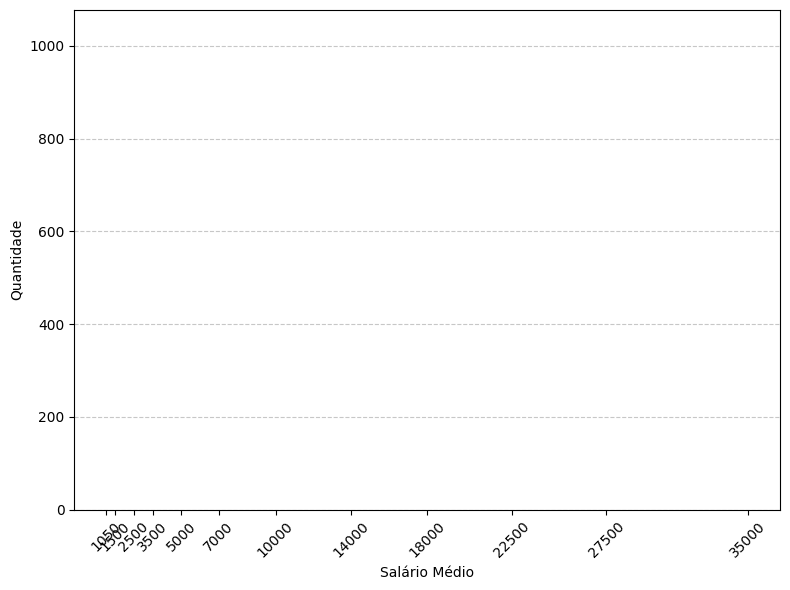

In [ ]:
val_unico_salario = df_original['Salario_Medio'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.bar(val_unico_salario.index, val_unico_salario.values, color='skyblue')
plt.xlabel('Salário Médio')
plt.ylabel('Quantidade')
plt.xticks(val_unico_salario.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostre o gráfico
plt.tight_layout() 
plt.show()